In [1]:
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sys
sys.path.append("../")

from unique_hypercube_size import *

%load_ext autoreload
%autoreload 2


In [3]:
"""

    Set up the parameters
    
"""

num_trials = 10
phase_resolution = 0.2


m_max = 6
k_max = 6

ms     = range(1, m_max + 1)
ks     = range(1, k_max + 1)

scales = np.sqrt(2.)**np.arange(m_max)


print ms
print ks

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6]


In [4]:
"""

    Run the experiments and 
    collect the data:
    
        - width 
        - det(R)  
        - volume of embedded unit cube
    
"""


width   = np.zeros((m_max, k_max, num_trials))


for t in xrange(num_trials):
    
    
    print "Trial: {}".format(t)
    
    
    _, results = doRandomModuleExperiment(ms, ks, scales, phase_resolution)
    
    for (m,k), r in results.iteritems():
        width[m-1,k-1, t] = r
    


    



Trial: 0
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9


In [5]:
"""

    Compute the quantities derived
    from data
    
"""



mean_width   = np.mean(width, axis=2) 




        

In [6]:
"""
    
    Compute the volumes for the 
    modules-per-axis strategy
    
"""





'\n    \n    Compute the volumes for the \n    modules-per-axis strategy\n    \n'

In [357]:
"""
    
    Save the data
    
"""

import datetime
timestamp = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d_%H:%M:%S')


exp_folder = "../results"
exp_tag    = "m{}_k{}_t{}_shuff_A__{}".format(m_max, k_max, num_trials, timestamp)

# filename = "{}/cap_data_{}.p".format(exp_folder, exp_tag)
filename = "{}/temp.p".format(exp_folder)

print filename

with open(filename,'wb') as f:
    pickle.dump({
        "width": width,
        "mean_width": mean_width,
        "ms": ms,
        "ks": ks,
        "phase_resolution": phase_resolution
    }, f)

../results/temp.p


In [358]:
print mean_width.shape

(6, 6)


In [359]:
a = np.zeros(k_max)
b = np.zeros(k_max)

# ind = [1,0,1,1,32,22,0,0,0,0,0,0]
ind = np.zeros(k_max).astype(int)
print width[:,0,:].shape
for k in ks:
    k_ = k - 1
    res = np.polyfit(ms, np.log( mean_width[:,k_] ), deg=1)
#     res = np.polyfit(ms, np.log( width[:,k_, ind[k_]] ), deg=1)
    a[k_] = res[0]
    b[k_] = res[1]
    
    
    

(6, 20)


(6, 6, 20)


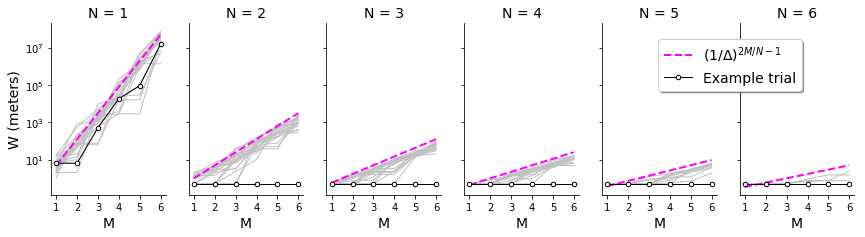

In [363]:
from io import BytesIO

fig, ax = plt.subplots(1, k_max  , 
                       figsize=(0.8*3.*k_max, 0.7*5), 
                       sharey=True);
# plt.suptitle("Max sidelength of cubic environment", y=1.)
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=None,
                wspace=None, hspace=None)


print width.shape
ax[0].set_ylabel("W (meters)")
ax[0].yaxis.label.set_fontsize(14)
# for k in range(1,5):
for k in ks:
    i = k - 1 
    k_ = k - 1
    ax[i].set_title("N = {}".format(k))
    ax[i].title.set_fontsize(14)
    ax[i].set_xticks(ms)
    ax[i].set_xlabel("M", fontsize=14)
    ax[i].set_yscale("log")
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    

    
    data_color = "silver"    
    scale = 1.
    for t in range(num_trials):
        ax[k_].plot(ms, width[:,k_, t]*scale, 
                 c=data_color, 
                 linestyle="-",
                 linewidth=1)  


    asym_ila =(1./phase_resolution)**(( 1.*(2.*np.array(ms))/float(k) - 1.))
#     asym = np.exp(a[k_]*np.array(ms) + b[k_])
#     a = 1.9*np.log(1./phase_resolution)
#     b = np.log( 1./phase_resolution )
#     asym = np.exp( a*np.array(ms)/float(k) - b     )
#     print k_

#     a_ = - .48 * float(k) + 2.5
#     b_ = -0.3 * float(k) - 1.
#     asym = np.exp(a_*np.array(ms) + b_)
#     asym = np.exp(a[k_]*np.array(ms) + b[k_])
    asym = np.exp(a[0]*np.array(ms)/float(k) + b[0])

#     ax[k_].plot(ms, asym,  
#              c="blue",  
#              markersize=6,
#              linestyle="-",
#              linewidth=2, label="$(1/\Delta)^{\\alpha (M/N - 1) }$") 
    
    
    ax[k_].plot(ms, asym_ila,  
             c="magenta",  
             markersize=6,
             linestyle="--",
             linewidth=2, label="$(1/\Delta)^{2M/N - 1 }$") 
          
    ax[k_].plot(ms, width[:,k_, ind[k_]]*scale, 
        c="black", 
        marker=".", 
        markersize=9,
         linestyle="-",
        markerfacecolor="white",
         linewidth=1,
              label="Example trial")  

ax[-1].legend(fontsize=14, fancybox=True, shadow=True, bbox_to_anchor=(.6, .95))


plt.savefig("cap_separate_sharey.png", format="png", dpi=300,     transparent=False)



plt.show()

In [ ]:


    




fig, ax = plt.subplots(1, k_max  , 
                       figsize=(0.8*3.*k_max, 0.7*5), 
                       sharey=False);


# ind = np.zeros(k_max).astype(int)
ind = [1,0,1,1,32,22]


for k in ks[:-3]:
    k_ = k - 1
    ax[k_].set_yscale("log")

    for t in range(num_trials):
        ax[k_].plot(ms, width[:,k_, t]*scale, 
                 c="silver", 
                 linestyle="-",
                 linewidth=1)  
        
#     ax[k_].plot(ms, width[:,k_,ind[k_]])
    
    
#     ax[k_].plot(ms, np.exp(a[k_]*np.array(ms) + b[k_]), linestyle="-")
    ax[k_].plot(ms, np.exp(a[0]*np.array(ms)/float(k) + b[0]), linestyle="-")
    
#     a_ = - .25 * 1/(float(k)) + 1.5
#     b_ = - 1.
#     print b_ - b[k_]
#     ax[k_].plot(ms, np.exp(a_*np.array(ms) + b_), linestyle="--", linewidth=2)
plt.show()


# plt.imshow(width[:,5,:])
# plt.show()
# plt.scatter(ks,np.exp(a))
# plt.scatter(ks, np.array(ks))
plt.scatter(ks,a)
# plt.scatter(ks, -.25*(np.array(ks)-1.) + 1.5, marker="X")
# plt.scatter(ks, 1./(np.array(ks)**4) + 2, marker="X")
# plt.scatter(ks, -0.*np.array(ks) - 1.6, marker="X")
plt.scatter(ks, b)

# asy = 
# plt.scatter(ks, np.array(ks) - m_max)

In [ ]:
plt.yscale("log")
k_= 3


for t in range(num_trials):
        
    plt.plot(ms, width[:,k_,t], c="silver")
#     plt.plot(ms, np.exp(a[k_]*np.array(ms) + b[k_]))

plt.plot(ms, np.sum(width[:,k_,:], axis=1)/float(num_trials), c="C0", linewidth=2)
plt.plot(ms, np.mean(width[:,k_,:], axis=1), c="C1", linewidth=2)
plt.show()
